In [54]:
import pyart
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
filename = 'PARstrat/output/20090527/cfrad.20090527_145347.000_to_20090527_145735.000_PAR_v1_SUR.nc'

In [55]:
RadParStrat = pyart.io.read(filename)

In [56]:
dir(RadParStrat)

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_sweep_in_range',
 '_dic_info',
 'add_field',
 'add_field_like',
 'altitude',
 'altitude_agl',
 'antenna_transition',
 'azimuth',
 'check_field_exists',
 'drift',
 'elevation',
 'extract_sweeps',
 'fields',
 'fixed_angle',
 'georefs_applied',
 'get_azimuth',
 'get_elevation',
 'get_end',
 'get_field',
 'get_slice',
 'get_start',
 'get_start_end',
 'heading',
 'info',
 'instrument_parameters',
 'iter_azimuth',
 'iter_elevation',
 'iter_end',
 'iter_field',
 'iter_slice',
 'iter_start',
 'iter_start_end',
 'latitude',
 'longitude',
 'metadata',
 'ngates',
 'nrays',
 'nsweeps',
 'pitch',
 'radar_calibration',
 'range',
 'ray_angle_res',
 'rays_are_indexed',
 'rays_per_sweep',
 'roll',
 'rotation',
 'scan_rate',
 'sc

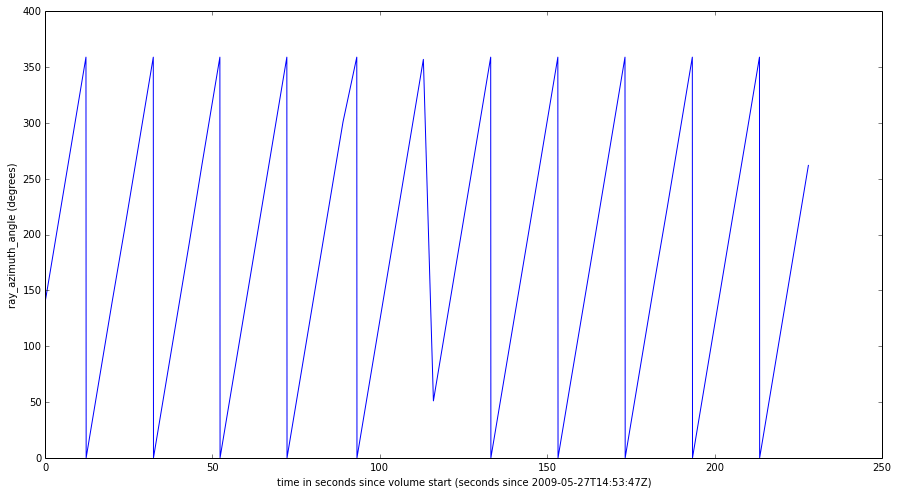

In [57]:
f = plt.figure(figsize=[15,8])
plt.plot(RadParStrat.time['data'], RadParStrat.azimuth['data'] )
plt.xlabel(RadParStrat.time['long_name'] + ' (' + RadParStrat.time['units'] + ')')
plt.ylabel(RadParStrat.azimuth['long_name'] + ' (' + RadParStrat.azimuth['units'] + ')')

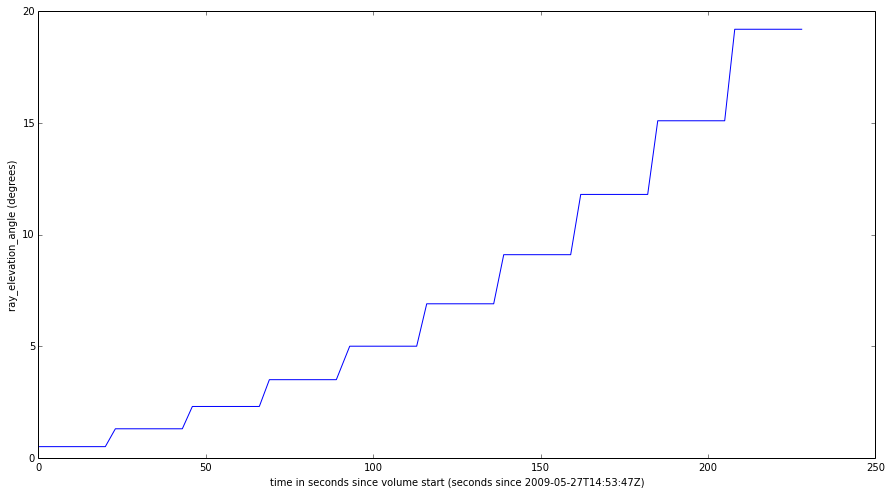

In [58]:
f = plt.figure(figsize=[15,8])
plt.plot(RadParStrat.time['data'], RadParStrat.elevation['data'] )
plt.xlabel(RadParStrat.time['long_name'] + ' (' + RadParStrat.time['units'] + ')')
plt.ylabel(RadParStrat.elevation['long_name'] + ' (' + RadParStrat.elevation['units'] + ')')

In [59]:
print RadParStrat.fields.keys()

[u'PhiDP', u'RhoHV', u'ZDR', u'dBZ', u'uPhiDP', u'W', u'V', u'KDP']


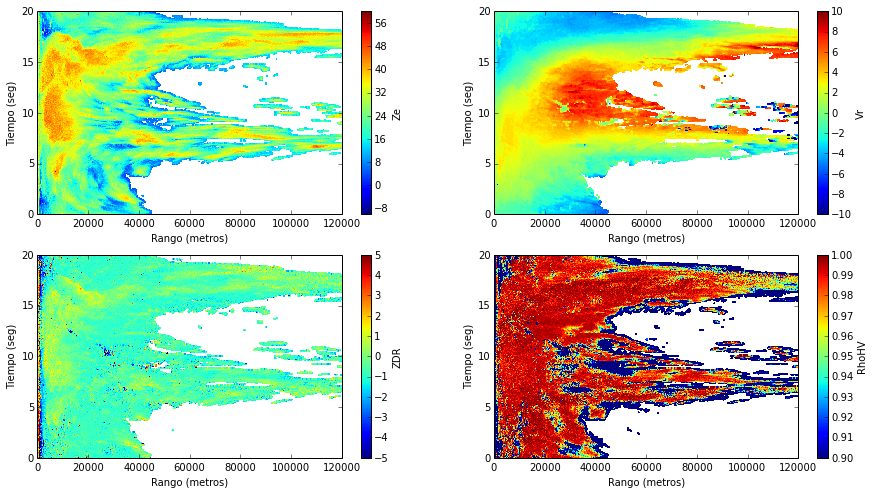

In [52]:
f = plt.figure(figsize=[15,8])

start_index = RadParStrat.sweep_start_ray_index['data'][0]
end_index = RadParStrat.sweep_end_ray_index['data'][0]

# Reflectividad Horizontal
plt.subplot(2, 2, 1) 
my_pc = plt.pcolormesh(RadParStrat.range['data'], RadParStrat.time['data'][start_index:end_index],
                       RadParStrat.fields['dBZ']['data'][start_index:end_index, :],vmin = -10, vmax = 60)
plt.xlabel('Rango (metros)')
plt.ylabel('Tiempo (seg)')
cb = plt.colorbar(mappable = my_pc)
cb.set_label('Ze')

# Velocidad Radial
plt.subplot(2, 2, 2) 
my_pc = plt.pcolormesh(RadParStrat.range['data'], RadParStrat.time['data'][start_index:end_index],
                       RadParStrat.fields['V']['data'][start_index:end_index, :],vmin = -10, vmax = 10)
plt.xlabel('Rango (metros)')
plt.ylabel('Tiempo (seg)')
cb = plt.colorbar(mappable = my_pc)
cb.set_label('Vr')

# Reflectividad Diferencial
plt.subplot(2, 2, 3) 
my_pc = plt.pcolormesh(RadParStrat.range['data'], RadParStrat.time['data'][start_index:end_index],
                       RadParStrat.fields['ZDR']['data'][start_index:end_index, :],vmin = -5, vmax = 5)
plt.xlabel('Rango (metros)')
plt.ylabel('Tiempo (seg)')
cb = plt.colorbar(mappable = my_pc)
cb.set_label('ZDR')

# Coeficiente de correlacion
plt.subplot(2, 2, 4) 
my_pc = plt.pcolormesh(RadParStrat.range['data'], RadParStrat.time['data'][start_index:end_index],
                       RadParStrat.fields['RhoHV']['data'][start_index:end_index, :],vmin = 0.9, vmax = 1)
plt.xlabel('Rango (metros)')
plt.ylabel('Tiempo (seg)')
cb = plt.colorbar(mappable = my_pc)
cb.set_label('RhoHV')


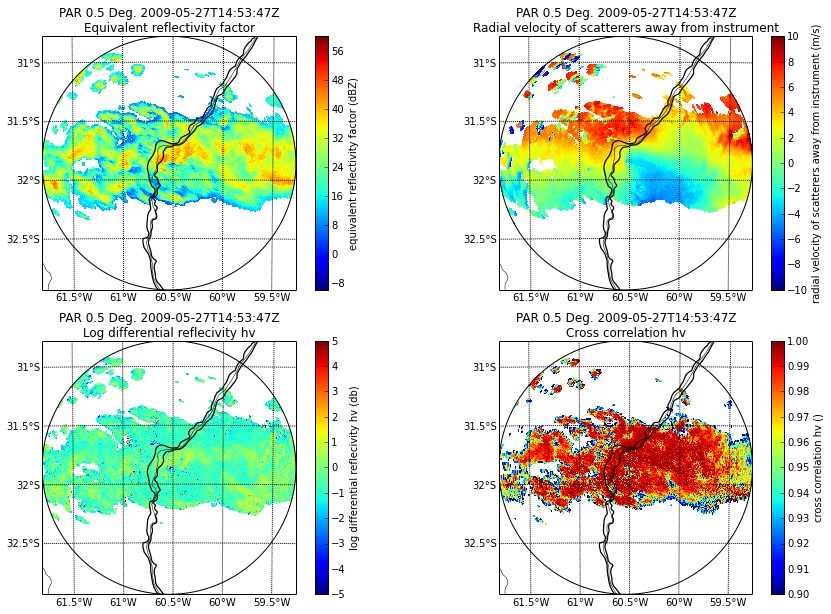

In [73]:
display = pyart.graph.RadarMapDisplay(RadParStrat)

f = plt.figure(figsize=[15,10])

minlon = RadParStrat.longitude['data']-1.5
maxlon = RadParStrat.longitude['data']+1.5
minlat = RadParStrat.latitude['data']-1.5
maxlat = RadParStrat.latitude['data']+1.5

plt.subplot(2, 2, 1) 
display.plot_ppi_map('dBZ', sweep=0, vmin = -10, vmax = 60,
                     lat_lines = np.arange(-35,-30,.5), lon_lines = np.arange(-65, -55, .5))
display.plot_range_ring(120., line_style='k-')

plt.subplot(2, 2, 2) 
display.plot_ppi_map('V', sweep=0, vmin = -10, vmax = 10,
                    lat_lines = np.arange(-35,-30,.5), lon_lines = np.arange(-65, -55, .5))
display.plot_range_ring(120., line_style='k-')

plt.subplot(2, 2, 3) 
display.plot_ppi_map('ZDR', sweep=0, vmin = -5, vmax = 5,
                    lat_lines = np.arange(-35,-30,.5), lon_lines = np.arange(-65, -55, .5))
display.plot_range_ring(120., line_style='k-')

plt.subplot(2, 2, 4) 
display.plot_ppi_map('RhoHV', sweep=0, vmin = 0.9, vmax = 1,
                    lat_lines = np.arange(-35,-30,.5), lon_lines = np.arange(-65, -55, .5))
display.plot_range_ring(120., line_style='k-')
